## **Start the Project**

### **Import the Library**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Input
import joblib

### **Loading Dataset**

In [33]:
#Load the dataset
df = pd.read_csv('ai4i2020.csv')

### **Gathering Data**

In [34]:
# Overview the dataset
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [35]:
# Check the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [36]:
# Describe the dataset
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### **Cleaning Data**

In [37]:
# Check for duplicated values
df.duplicated().sum()

np.int64(0)

In [38]:
# Check for null values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [39]:
# Drop the 'UDI' column as it is not needed for the analysis
df.drop(columns=['UDI'], inplace=True)

In [40]:
# Overview the dataset after dropping 'UDI'
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### **Assessing Data**

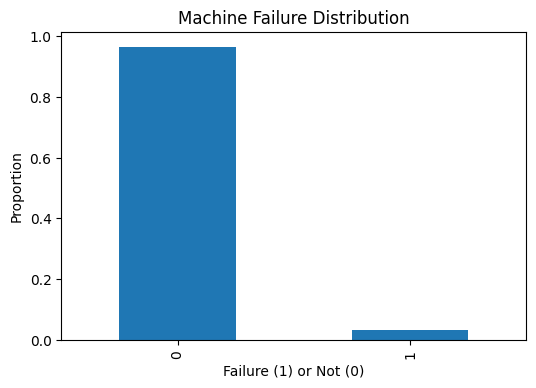

In [41]:
# Check the distribution of the target variable 'Machine failure'
df['Machine failure'].value_counts(normalize=True).plot(kind='bar', title='Machine Failure Distribution', figsize=(6, 4))
plt.xlabel('Failure (1) or Not (0)')
plt.ylabel('Proportion')
plt.show()

In [42]:
# Label encode the 'Type' column
le = LabelEncoder()
df['Type_encoded'] = le.fit_transform(df['Type'])

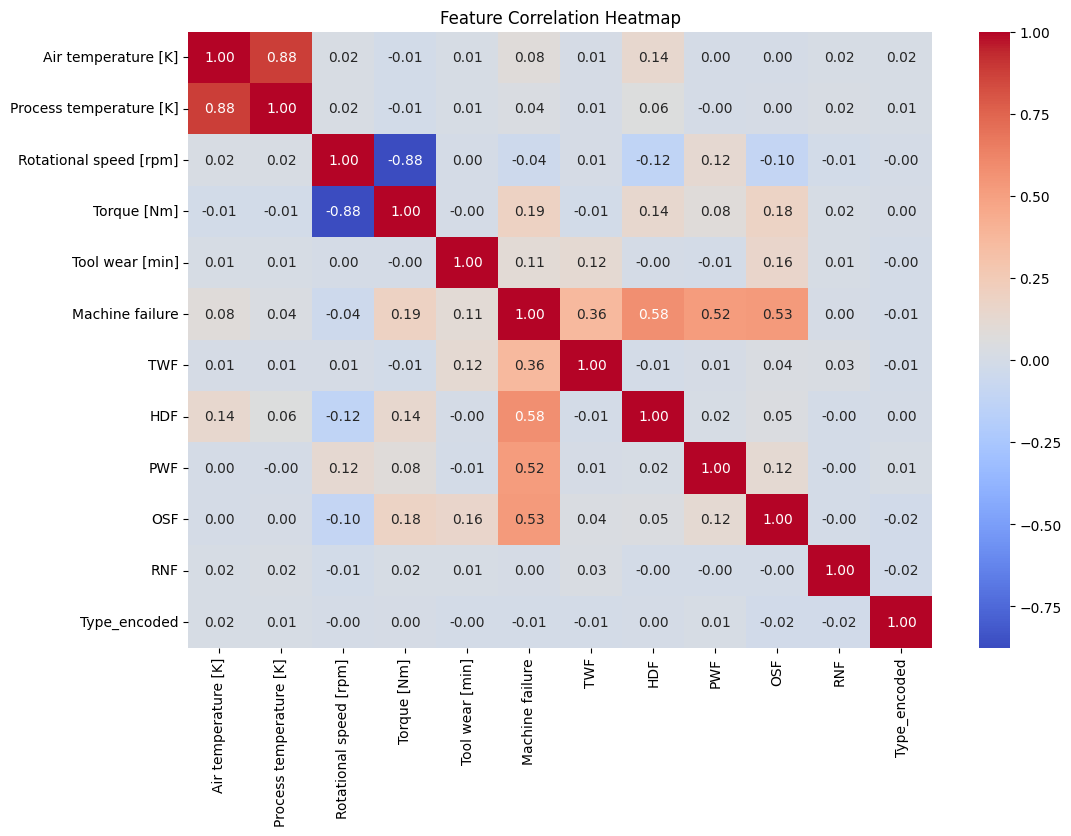

In [43]:
# Drop the original Product ID and Type columns
plt.figure(figsize=(12, 8))
corr = df.drop(columns=['Product ID', 'Type']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [44]:
# Numeric features for scaling
numeric_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

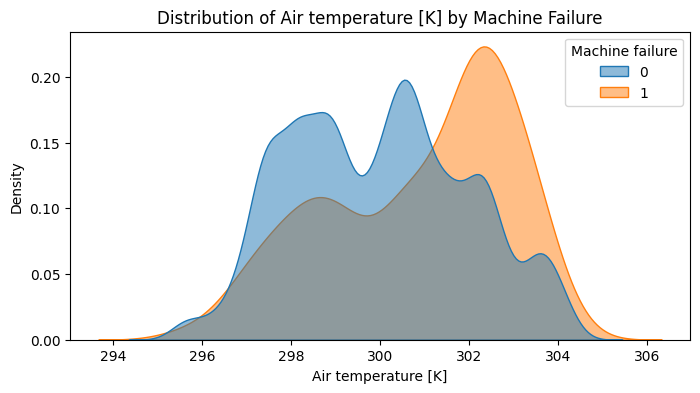

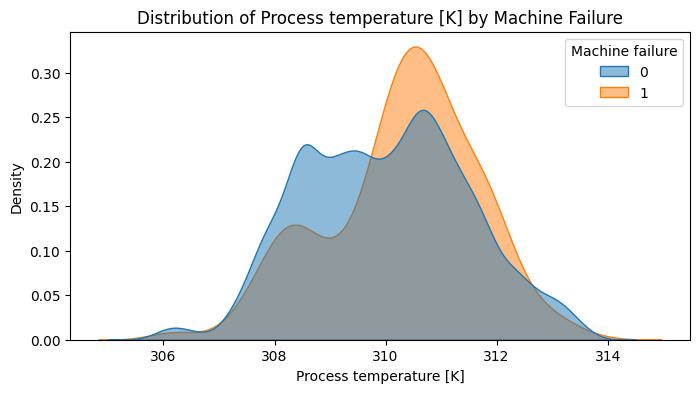

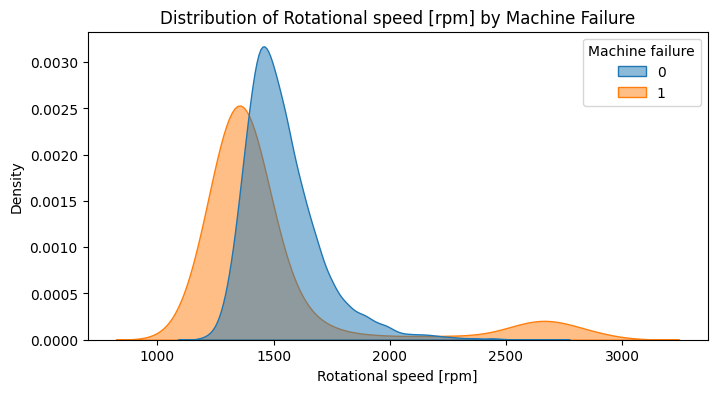

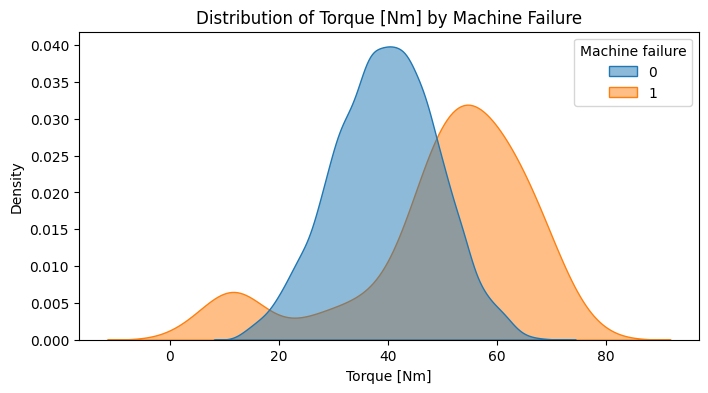

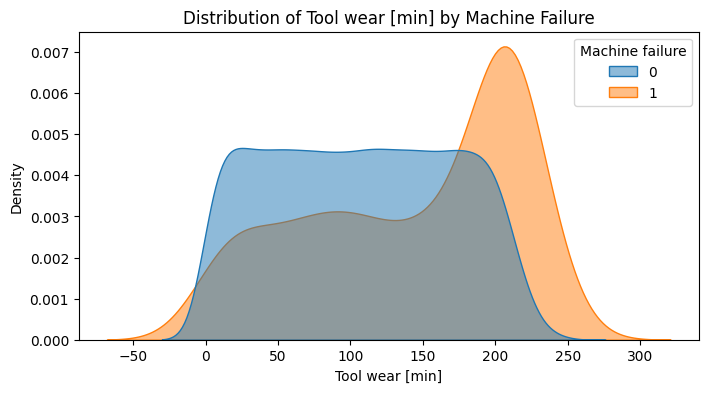

In [45]:
# Visualize the distribution of numeric features
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue='Machine failure', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {col} by Machine Failure')
    plt.show()

## **Preprocessing**

### **Explore Data**

In [46]:
# Drop the 'Product ID' and 'Type' columns as they are not needed for the analysis
df.drop(columns=['Product ID', 'Type'], inplace=True)

### **Feature Engineering**

In [47]:
# Create a new feature 'Power' based on Torque and Rotational speed
df['Power'] = (df['Torque [Nm]'] * (df['Rotational speed [rpm]'] * 2 * np.pi / 60))

In [48]:
# X and y split: Define features and target variable
X = df.drop(columns=['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])  # Drop failure mode flags
y = df['Machine failure']

In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [50]:
# Smote for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
# Class weights for the model
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = dict(zip(np.unique(y_train_resampled), class_weights))

In [52]:
# Initialize the scaler and fit it to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## **Model Classification**

### **Making a Model**

In [53]:
# Model building
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
# Train the model
history = model.fit(X_train_scaled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weight_dict)

Epoch 1/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7428 - loss: 0.5132 - val_accuracy: 0.8305 - val_loss: 0.3893
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8704 - loss: 0.3085 - val_accuracy: 0.8748 - val_loss: 0.2913
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8855 - loss: 0.2794 - val_accuracy: 0.8868 - val_loss: 0.2767
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8936 - loss: 0.2563 - val_accuracy: 0.8849 - val_loss: 0.2673
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8993 - loss: 0.2455 - val_accuracy: 0.8897 - val_loss: 0.2755
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9068 - loss: 0.2314 - val_accuracy: 0.9272 - val_loss: 0.2017
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9101 - loss: 0.2177 - val_accuracy: 0.9088 - val_loss: 0.2444
Epoch 8/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9155 - loss: 0.2136 - val_accuracy: 0.

### **Evaluate the Model**

In [55]:
# Classification report
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype("int32")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1932
           1       0.33      0.82      0.47        68

    accuracy                           0.94      2000
   macro avg       0.66      0.88      0.72      2000
weighted avg       0.97      0.94      0.95      2000



I managed to improve the model's ability to detect machine failures, albeit at the trade-off of a slight decrease in precision.

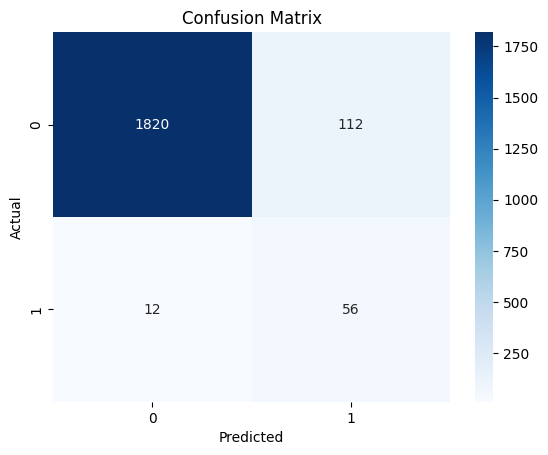

In [56]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

There was a decrease in FN from 44 → 9, showing that the recall of class 1 improved drastically.

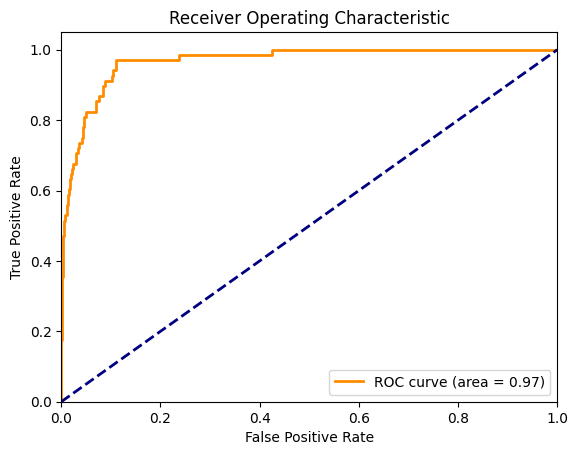

In [57]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

AUC: 0.97 → indicating the model has excellent classification performance in general.

### **Save the Model**

In [58]:
# Save the model
model.save("maintenance_model.keras")

In [59]:
# Save the scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']